In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import json
import os
import shutil
import random
from PIL import Image

In [2]:
#conda install pillow

In [3]:
# Définir les transformations pour les données
transform_couleur = transforms.Compose([
    transforms.Resize((112, 112)),  # Redimensionner les images à 112x112
    transforms.ToTensor(),  # Convertir les images en tenseurs PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normaliser avec les statistiques de l'ImageNet
])

# Définir une nouvelle transformation pour convertir les images en niveaux de gris
transform = transforms.Compose([
    transforms.Resize((112, 112)),  # Redimensionner les images à 112x112
    transforms.Grayscale(),  # Convertir les images en niveaux de gris
    transforms.ToTensor(),  # Convertir les images en tenseurs PyTorch
])

# Télécharger et charger le jeu de données Flowers102
dataset = datasets.Flowers102(root='./data', 
                              split='train', 
                              transform=transform_couleur, 
                              download=True)

# Séparer les données en ensemble d'entraînement et de test
# Calculer la taille de chaque sous-dataset
half_size = len(dataset) // 2

# Diviser le dataset en deux parties égales
dataset1, dataset2 = random_split(dataset, [half_size, len(dataset) - half_size])

# Définir les proportions pour l'entraînement et le test
train_size = int(0.8 * len(dataset1))
test_size = len(dataset1) - train_size

# Diviser dataset1 en ensemble d'entraînement et de test
train_dataset, test_dataset = random_split(dataset1, [train_size, test_size])

In [17]:
dataset

Dataset Flowers102
    Number of datapoints: 1020
    Root location: ./data
    split=train
    StandardTransform
Transform: Compose(
               Resize(size=(112, 112), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [4]:
print("nombre d'échantillons d'entraînement: " + str(len(train_dataset)) + "\n" +
      "nombre d'échantillons de test: " + str(len(test_dataset)))

nombre d'échantillons d'entraînement: 408
nombre d'échantillons de test: 102


In [5]:
print("type de données du 1er échantillon d'entraînement: ", train_dataset[0][0].type())
print("taille du 1er échantillon d'entraînement: ", train_dataset[0][0].size())

type de données du 1er échantillon d'entraînement:  torch.FloatTensor
taille du 1er échantillon d'entraînement:  torch.Size([3, 112, 112])


In [6]:
 train_dataset

In [7]:
# vérifier l'étiquette des deux premiers échantillons d'entraînement
print("étiquette du premier échantillon d'entraînement : ", train_dataset[0][1])
print("étiquette du deuxième échantillon d'entraînement : ", train_dataset[1][1])

étiquette du premier échantillon d'entraînement :  60
étiquette du deuxième échantillon d'entraînement :  55


In [8]:
# Charger le fichier .mat contenant les labels
mat = scipy.io.loadmat('./data/flowers-102/imagelabels.mat')

# Les labels sont dans le fichier .mat sous la clé 'labels'
labels = mat['labels'][0]

# Les noms des classes en utilisant la documentation Flowers102
class_names = [
    'pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'wild geranium', 'tiger lily',
    'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', 'colt\'s foot', 'king protea',
    'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily',
    'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers',
    'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster',
    'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy',
    'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy',
    'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura',
    'geranium', 'orange dahlia', 'pink-yellow dahlia', 'cautleya spicata', 'japanese anemone', 'black-eyed susan',
    'silverbush', 'californian poppy', 'osteospermum', 'spring crocus', 'iris', 'windflower', 'tree poppy', 'gazania',
    'azalea', 'water lily', 'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium',
    'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen', 'watercress',
    'canna lily', 'hippeastrum', 'bee balm', 'pink quill', 'foxglove', 'bougainvillea', 'camellia', 'mallow', 'mexican petunia',
    'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily', 'common tulip', 'wild rose'
]

# Vérifier la correspondance entre les indices et les noms des classes
print(f'Il y a {len(class_names)} noms de classes.')

Il y a 104 noms de classes.


In [9]:
# Créer les DataLoader pour itérer sur les jeux de données
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


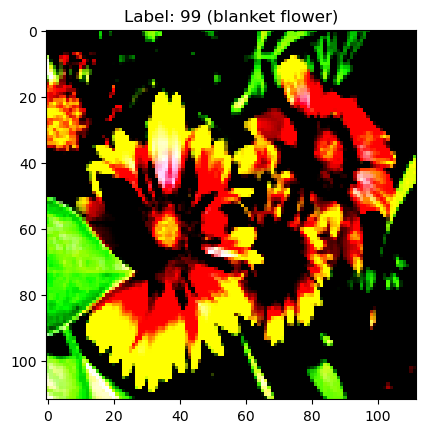

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


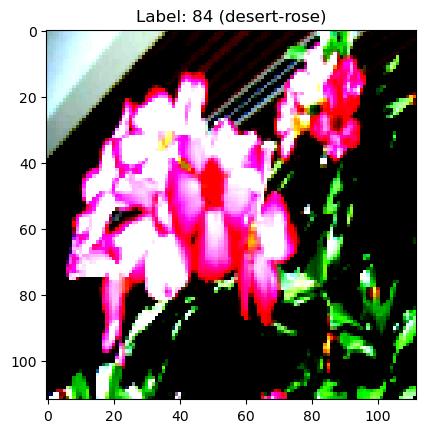

Les deux premières étiquettes dans l'ensemble d'entraînement sont : 99 (blanket flower) et 84 (desert-rose)


In [11]:

# Fonction pour afficher une image
def imshow(img, title=None):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    if title is not None:
        plt.title(title)
    plt.show()

# Obtenir les deux premières images de l'ensemble d'entraînement
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Afficher les deux premières images avec leurs étiquettes
for i in range(2):
    imshow(images[i], title=f'Label: {labels[i].item()} ({class_names[labels[i].item()]})')

print(f'Les deux premières étiquettes dans l\'ensemble d\'entraînement sont : {labels[0].item()} ({class_names[labels[0].item()]}) et {labels[1].item()} ({class_names[labels[1].item()]})')

# Construire le modèle avec nn.Module

Voici la création du modèle avec nn.Module pour notre modèle de régression logistique. Cette classe est similaire à celle des publications précédentes, mais les nombres d'entrée et de sortie sont configurables.

In [12]:
# Création du module personnalisé pour la régression logistique
class RegressionLogistique(torch.nn.Module):
    
    # Définition du constructeur
    def __init__(self, n_entrees, n_sorties):
        super().__init__()
        self.lineaire = torch.nn.Linear(n_entrees, n_sorties)
        
    # Prédiction
    def forward(self, x):
        # y_pred = torch.sigmoid(self.lineaire(x))
        y_pred = torch.softmax(self.lineaire(x), dim=1)  # Utiliser softmax pour la régression logistique multinomiale
        return y_pred

In [13]:
# Définir le modèle
n_entrees = 112 * 112 * 3 # Dimension d'entrée des images (112x112 avec 3 canaux)
n_sorties = 102  # Nombre de classes dans Flowers102
reg_log = RegressionLogistique(n_entrees, n_sorties)

In [14]:
# Définition de l'optimiseur
optimiseur = torch.optim.SGD(reg_log.parameters(), lr=0.001)

# Définition de la perte d'entropie croisée
critere = torch.nn.CrossEntropyLoss()

epochs = 25
Perte = []
acc = []

for epoque in range(epochs):
    reg_log.train()
    for images, etiquettes in train_loader:
        optimiseur.zero_grad()
        images = images.view(-1, 112 * 112 * 3)  # Aplatir les images
        sorties = reg_log(images)
        perte = critere(sorties, etiquettes)
        perte.backward()
        optimiseur.step()
    
    Perte.append(perte.item())
    
    correct = 0
    reg_log.eval()
    with torch.no_grad():
        for images, etiquettes in test_loader:
            images = images.view(-1, 112 * 112 * 3)  # Aplatir les images
            sorties = reg_log(images)
            _, predit = torch.max(sorties.data, 1)
            correct += (predit == etiquettes).sum().item()
    
    precision = 100 * correct / len(test_dataset)
    acc.append(precision)
    
    if epoque % 5 == 0:
        print('Époque : {}. Perte : {}. Précision : {}'.format(epoque, perte.item(), precision))


Époque : 0. Perte : 4.625542163848877. Précision : 1.9607843137254901
Époque : 5. Perte : 4.626407146453857. Précision : 1.9607843137254901
Époque : 10. Perte : 4.628617763519287. Précision : 2.9411764705882355
Époque : 15. Perte : 4.5651936531066895. Précision : 4.901960784313726
Époque : 20. Perte : 4.496212482452393. Précision : 6.862745098039215


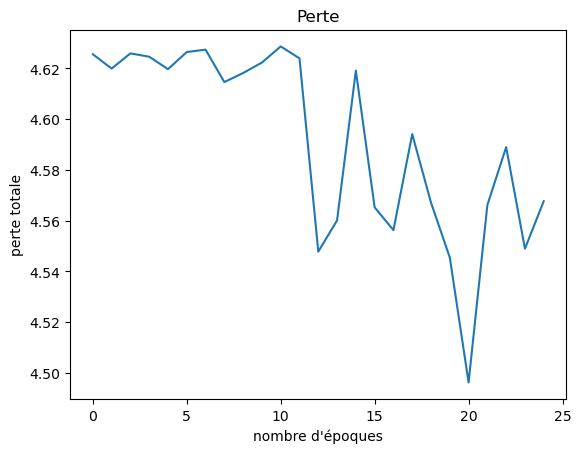

In [15]:
plt.plot(Perte)
plt.xlabel("nombre d'époques")
plt.ylabel("perte totale")
plt.title("Perte")
plt.show()

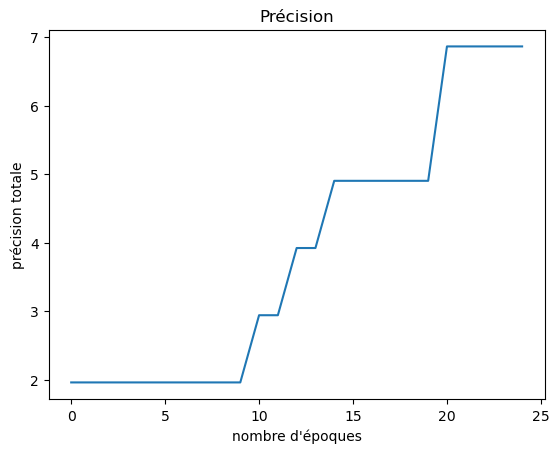

In [16]:
plt.plot(acc)
plt.xlabel("nombre d'époques")
plt.ylabel("précision totale")
plt.title("Précision")
plt.show()